# Vegetation analyses

### Multi variate linear regression

Do this:
* Plot total biomass vs NDVI
* Predict NDVI with vegetation features - plot for all sites
* Predict NDVI with vegetation features + cultural/natural - plot for all sites
* Use mean of above predictions and plot each site with std dev

In [53]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression
import pandas as pd
import scipy

# import data
f = 'biomass_weights.csv'
df = pd.read_csv(f, sep=',',header=0)
df = df.values
'''
# convert nan to 0
df[np.isnan(df)] = 0

# select data
featNum = 6
bm = df[:,0:featNum]
ndvi = df[:,9]
#index = []
#for elem in range(0,len(bm)):
#    if bm[elem].sum() == 0:
#        index.append(elem)
#bm = np.delete(bm,index)   
#ndvi = np.delete(ndvi,index)
#bm = np.reshape(bm,(60-len(index),featNum))
#print bm.shape
#print ndvi.shape

bmTotal = np.sum(bm, axis=1)
               
# log transform
bm = np.log10(bm+1)
#ndvi = np.log(ndvi)
bmTotal = np.log10(bmTotal+1)
#plt.hist(bm.flatten())

# add location - in order: sandnes, iffiartafik, qoornoq, ersaa, kangeq
loc = np.zeros((60,5))
loc[0:12] = [1,0,0,0,0]
loc[13:24] = [0,1,0,0,0]
loc[25:36] = [0,0,1,0,0]
loc[37:48] = [0,0,0,1,0]
loc[49:60] = [0,0,0,0,1]
#bm = np.concatenate((bm, loc), axis=1)
#featNum = featNum + 5

# add tp (cultural/natural)
tp = np.zeros((60,2))
tp[0:6] = [1,0]
tp[7:12] = [0,1]
tp[13:18] = [1,0]
tp[19:24] = [0,1]
tp[25:30] = [1,0]
tp[31:36] = [0,1]
tp[37:42] = [1,0]
tp[43:48] = [0,1]
tp[49:54] = [1,0]
tp[55:60] = [0,1]
bm = np.concatenate((bm, tp), axis=1)
featNum = featNum + 2

# center
#bm = bm - bm.mean(axis=0,keepdims=True)
#bm = bm/bm.std(axis=0,keepdims=True)
'''

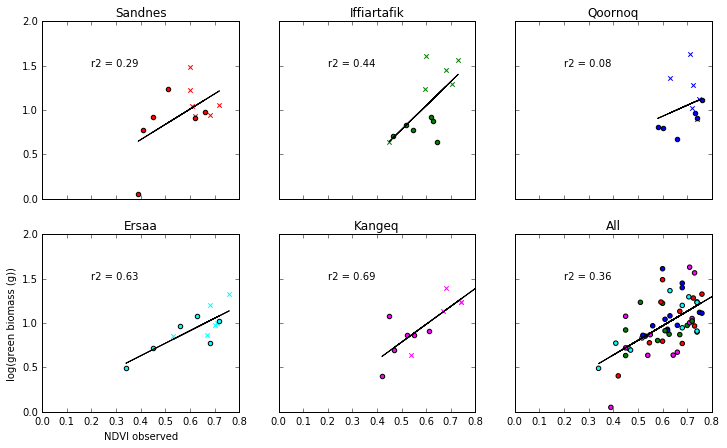

In [56]:
bmTotalSite = np.reshape(bmTotal,(10,6))
ndviSiteType = np.reshape(ndvi,(10,6))
col_sandnes = 'red'
col_iffiartafik = 'green'
col_qoornoq = 'blue'
col_ersaa = 'cyan'
col_kangeq = 'magenta'

cultural = 'x'
natural = 'o'

# row and column sharing
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
f.set_size_inches(12, 7)
ax4.set_xlabel('NDVI observed')
ax4.set_ylabel('log(green biomass (g))')
ax1.scatter(ndviSiteType[0],bmTotalSite[0],c=col_sandnes, marker=cultural)
ax1.scatter(ndviSiteType[1],bmTotalSite[1],c=col_sandnes, marker=natural)
ax1.set_xlim([0.0,0.8])
ax1.set_ylim([0.0,2.0])
ax1.set_title('Sandnes')
ax2.scatter(ndviSiteType[2],bmTotalSite[2],c=col_iffiartafik, marker=cultural)
ax2.scatter(ndviSiteType[3],bmTotalSite[3],c=col_iffiartafik, marker=natural)
ax2.set_xlim([0.0,0.8])
ax2.set_title('Iffiartafik')
ax3.scatter(ndviSiteType[4],bmTotalSite[4],c=col_qoornoq, marker=cultural)
ax3.scatter(ndviSiteType[5],bmTotalSite[5],c=col_qoornoq, marker=natural)
ax3.set_xlim([0.0,0.8])
ax3.set_title('Qoornoq')
ax4.scatter(ndviSiteType[6],bmTotalSite[6],c=col_ersaa, marker=cultural)
ax4.scatter(ndviSiteType[7],bmTotalSite[7],c=col_ersaa, marker=natural)
ax4.set_ylim([0.0,2.0])
ax4.set_title('Ersaa')
ax5.scatter(ndviSiteType[8],bmTotalSite[8],c=col_kangeq, marker=cultural)
ax5.scatter(ndviSiteType[9],bmTotalSite[9],c=col_kangeq, marker=natural)
ax5.set_title('Kangeq')
ax6.scatter(ndvi, bmTotalSite,c=[col_sandnes,col_iffiartafik,col_qoornoq,col_ersaa,col_kangeq])
ax6.set_title('All')

bm1 = np.reshape(bmTotalSite[0:2],(12))
ndvi1 = np.reshape(ndviSiteType[0:2],(12))
fit = np.polyfit(ndvi1,bm1,1)
ax1.plot(ndvi1, fit[0] * ndvi1 + fit[1], color='black')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ndvi1, bm1)
ax1.text(0.2, 1.5, 'r2 = '+'{0:.2f}'.format(r_value*r_value))

bm1 = np.reshape(bmTotalSite[2:4],(12))
ndvi1 = np.reshape(ndviSiteType[2:4],(12))
fit = np.polyfit(ndvi1,bm1,1)
ax2.plot(ndvi1, fit[0] * ndvi1 + fit[1], color='black')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ndvi1, bm1)
ax2.text(0.2, 1.5, 'r2 = '+'{0:.2f}'.format(r_value*r_value))

bm1 = np.reshape(bmTotalSite[4:6],(12))
ndvi1 = np.reshape(ndviSiteType[4:6],(12))
fit = np.polyfit(ndvi1,bm1,1)
ax3.plot(ndvi1, fit[0] * ndvi1 + fit[1], color='black')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ndvi1, bm1)
ax3.text(0.2, 1.5, 'r2 = '+'{0:.2f}'.format(r_value*r_value))

bm1 = np.reshape(bmTotalSite[6:8],(12))
ndvi1 = np.reshape(ndviSiteType[6:8],(12))
fit = np.polyfit(ndvi1,bm1,1)
ax4.plot(ndvi1, fit[0] * ndvi1 + fit[1], color='black')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ndvi1, bm1)
ax4.text(0.2, 1.5, 'r2 = '+'{0:.2f}'.format(r_value*r_value))

bm1 = np.reshape(bmTotalSite[8:10],(12))
ndvi1 = np.reshape(ndviSiteType[8:10],(12))
fit = np.polyfit(ndvi1,bm1,1)
ax5.plot(ndvi1, fit[0] * ndvi1 + fit[1], color='black')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ndvi1, bm1)
ax5.text(0.2, 1.5, 'r2 = '+'{0:.2f}'.format(r_value*r_value))

bm1 = bmTotal
ndvi1 = ndvi
fit = np.polyfit(ndvi1,bm1,1)
ax6.plot(ndvi1, fit[0] * ndvi1 + fit[1], color='black')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ndvi1, bm1)
ax6.text(0.2, 1.5, 'r2 = '+'{0:.2f}'.format(r_value*r_value))

In [ ]:
bmTotalSite = np.reshape(bmTotal,(10,6))
ndviSiteType = np.reshape(ndvi,(10,6))
colList = ['red', 'green', 'blue', 'cyan', 'magenta']
typeList = []

cultural = 'x'
natural = 'o'

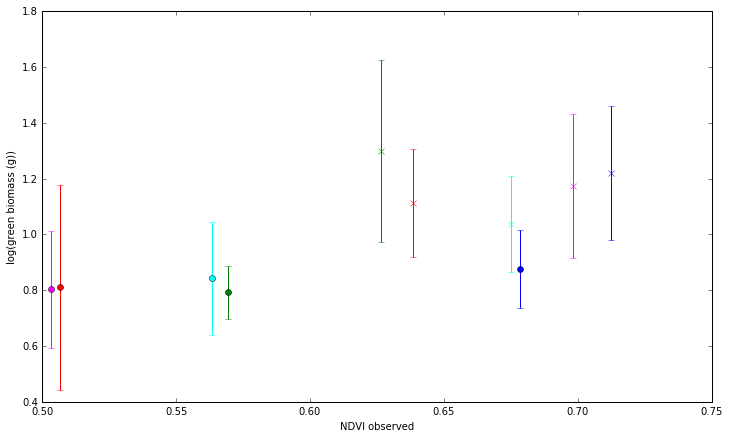

In [65]:
f = plt.figure(1)
plt.errorbar(ndviSiteType[0].mean(), bmTotalSite[0].mean(), bmTotalSite[0].std(), c=col_sandnes, marker=cultural)
plt.errorbar(ndviSiteType[1].mean(), bmTotalSite[1].mean(), bmTotalSite[1].std(), c=col_sandnes, marker=natural)
plt.errorbar(ndviSiteType[2].mean(), bmTotalSite[2].mean(), bmTotalSite[2].std(), c=col_iffiartafik, marker=cultural)
plt.errorbar(ndviSiteType[3].mean(), bmTotalSite[3].mean(), bmTotalSite[3].std(), c=col_iffiartafik, marker=natural)
plt.errorbar(ndviSiteType[4].mean(), bmTotalSite[4].mean(), bmTotalSite[4].std(), c=col_qoornoq, marker=cultural)
plt.errorbar(ndviSiteType[5].mean(), bmTotalSite[5].mean(), bmTotalSite[5].std(), c=col_qoornoq, marker=natural)
plt.errorbar(ndviSiteType[6].mean(), bmTotalSite[6].mean(), bmTotalSite[6].std(), c=col_ersaa, marker=cultural)
plt.errorbar(ndviSiteType[7].mean(), bmTotalSite[7].mean(), bmTotalSite[7].std(), c=col_ersaa, marker=natural)
plt.errorbar(ndviSiteType[8].mean(), bmTotalSite[8].mean(), bmTotalSite[8].std(), c=col_kangeq, marker=cultural)
plt.errorbar(ndviSiteType[9].mean(), bmTotalSite[9].mean(), bmTotalSite[9].std(), c=col_kangeq, marker=natural)
ax = plt.gca()
ax.set_xlabel('NDVI observed')
ax.set_ylabel('log(green biomass (g))')
f.set_size_inches(12, 7)

In [66]:
clf = BayesianRidge(compute_score=True)
clf.fit(bm, ndvi)
ols = LinearRegression()
ols.fit(bm, ndvi)
#hub = HuberRegressor()
#hub.fit(bm, ndvi)

fit = ols
fit.predict(bm)
#plt.scatter(fit.predict(bm),ndvi)
r = fit.score(bm,ndvi)

print r
print fit.coef_ / np.sum(fit.coef_)

0.48686503979
[ 0.15344373  0.15172146  0.17806771  0.15310972  0.24437134  0.09563173
  0.04268368 -0.01902937]


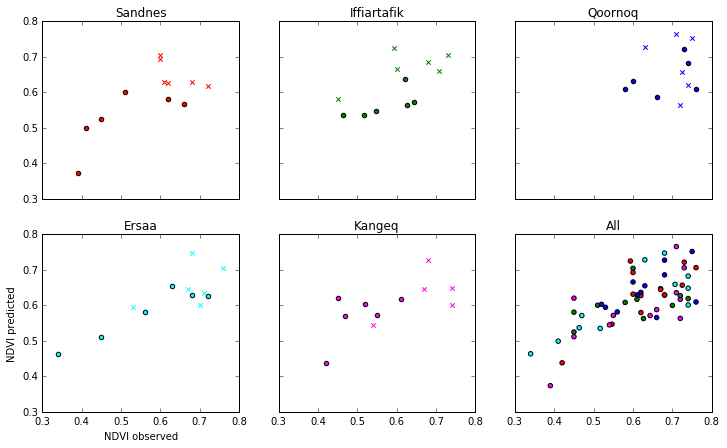

In [67]:
p = ols.predict(bm)
p = np.reshape(p,(10,6))
ndviSiteType = np.reshape(ndvi,(10,6))
col_sandnes = 'red'
col_iffiartafik = 'green'
col_qoornoq = 'blue'
col_ersaa = 'cyan'
col_kangeq = 'magenta'

cultural = 'x'
natural = 'o'

# row and column sharing
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
f.set_size_inches(12, 7)
ax4.set_xlabel('NDVI observed')
ax4.set_ylabel('NDVI predicted')
ax1.scatter(ndviSiteType[0],p[0],c=col_sandnes, marker=cultural)
ax1.scatter(ndviSiteType[1],p[1],c=col_sandnes, marker=natural)
ax1.set_xlim([0.3,0.8])
ax1.set_ylim([0.3,0.8])
ax1.set_title('Sandnes')
ax2.scatter(ndviSiteType[2],p[2],c=col_iffiartafik, marker=cultural)
ax2.scatter(ndviSiteType[3],p[3],c=col_iffiartafik, marker=natural)
ax2.set_xlim([0.3,0.8])
ax2.set_title('Iffiartafik')
ax3.scatter(ndviSiteType[4],p[4],c=col_qoornoq, marker=cultural)
ax3.scatter(ndviSiteType[5],p[5],c=col_qoornoq, marker=natural)
ax3.set_xlim([0.3,0.8])
ax3.set_title('Qoornoq')
ax4.scatter(ndviSiteType[6],p[6],c=col_ersaa, marker=cultural)
ax4.scatter(ndviSiteType[7],p[7],c=col_ersaa, marker=natural)
ax4.set_ylim([0.3,0.8])
ax4.set_title('Ersaa')
ax5.scatter(ndviSiteType[8],p[8],c=col_kangeq, marker=cultural)
ax5.scatter(ndviSiteType[9],p[9],c=col_kangeq, marker=natural)
ax5.set_title('Kangeq')
ax6.scatter(ndvi, p,c=[col_sandnes,col_iffiartafik,col_qoornoq,col_ersaa,col_kangeq])
ax6.set_title('All')

In [68]:
# Save data to csv
#bm = np.c_[bm,ndvi]
#f2 = 'biomass.csv'
#np.savetxt(f2, bm, delimiter=",")

# Save predictions to csv
f3 = 'biomass_predicted.csv'
p_out = np.reshape(p,(60))
np.savetxt(f3, p_out, delimiter=",")

0.93880175879
[  3.12376791e-01   3.54369542e-01  -2.44737662e-15  -4.39451435e-01
  -1.32290628e-16   2.10176765e-01   8.56408092e-02   4.87963850e-01
  -3.05288823e-01   2.94212501e-01]
0.795303463616
[  2.42694486e-02   5.52024799e-16   1.97119464e-01  -1.09443039e-02
  -4.78957849e-03   3.40250099e-01   5.24035901e-01   5.50267709e-03
   7.59145348e-03  -8.30351605e-02]
0.897386460759
[-0.0184145   0.00501143  0.06241408 -0.0537831   0.02646783 -0.02470222
  0.05005904  0.94488678  0.04290374 -0.03484308]
0.976314954959
[ -2.71938197e-02   5.09571440e-01   5.80205542e-02   3.83900767e-02
   7.44222116e-02   9.44305711e-02   1.60837301e-01  -2.95496872e-17
   8.75837572e-02   3.93790847e-03]
0.949875266544
[  1.49855212e-01  -1.62574009e-01   8.11682893e-02  -1.76937437e-15
   1.00148790e-01   0.00000000e+00  -7.37096071e-02   8.59887496e-01
   1.45977610e-02   3.06260691e-02]


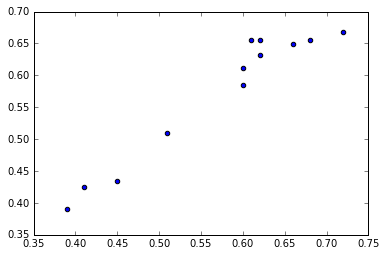

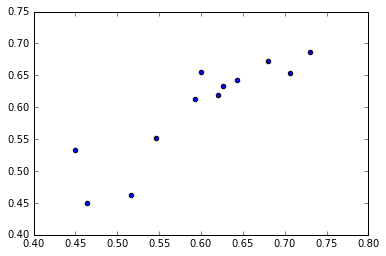

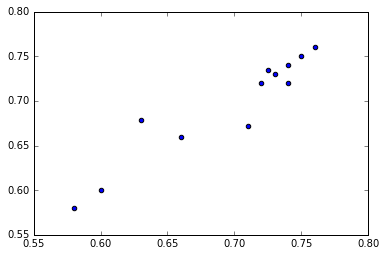

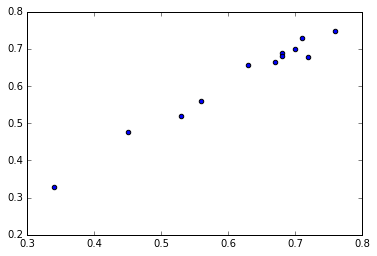

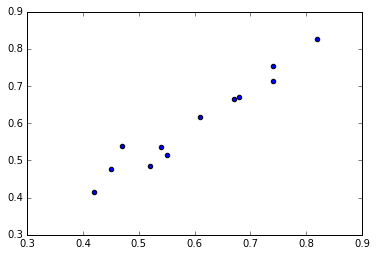

In [40]:
bmSite = np.reshape(bm,(5,12,featNum))
ndviSite = np.reshape(ndvi,(5,12))
olsSite = LinearRegression()

for siteNum in range(0,5):
    olsSite.fit(bmSite[siteNum], ndviSite[siteNum])
    plt.figure(siteNum)
    plt.scatter(ndviSite[siteNum],olsSite.predict(bmSite[siteNum]))
    print olsSite.score(bmSite[siteNum],ndviSite[siteNum])
    print olsSite.coef_ / np.sum(olsSite.coef_)